In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split                                
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('/content/Train.csv')


In [ ]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
print(train.shape)

(8523, 12)


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
corr = numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


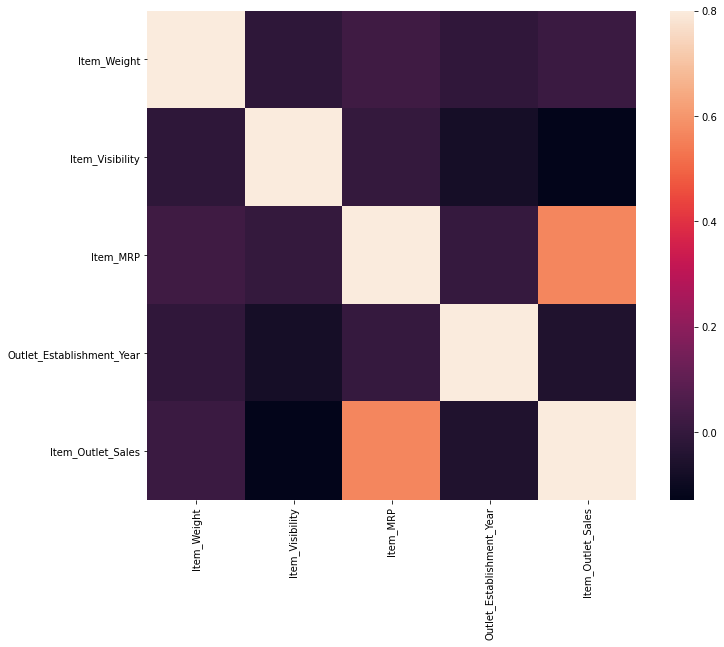

In [ ]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.8, square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

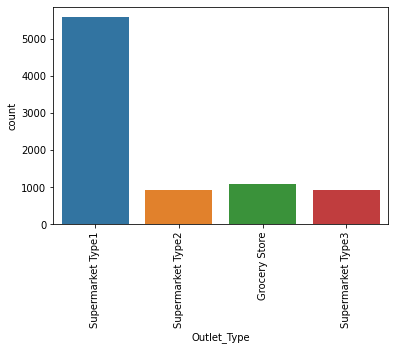

In [ ]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


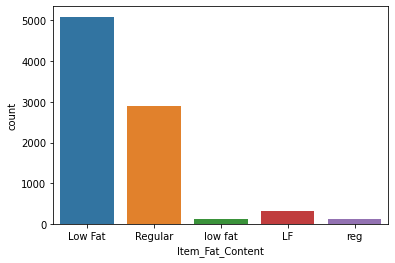

In [ ]:
sns.countplot(train.Item_Fat_Content)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

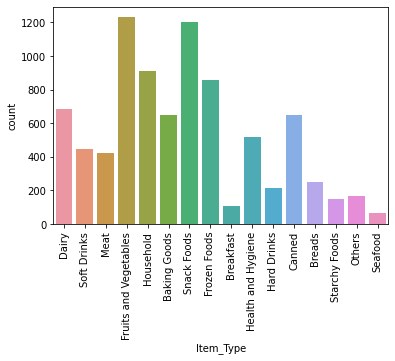

In [ ]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


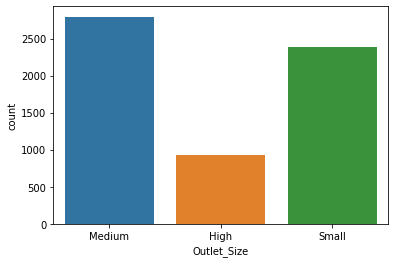

In [ ]:
sns.countplot(train.Outlet_Size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


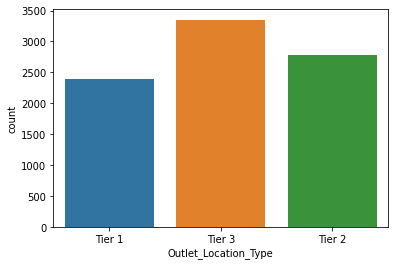

In [ ]:
sns.countplot(train.Outlet_Location_Type)

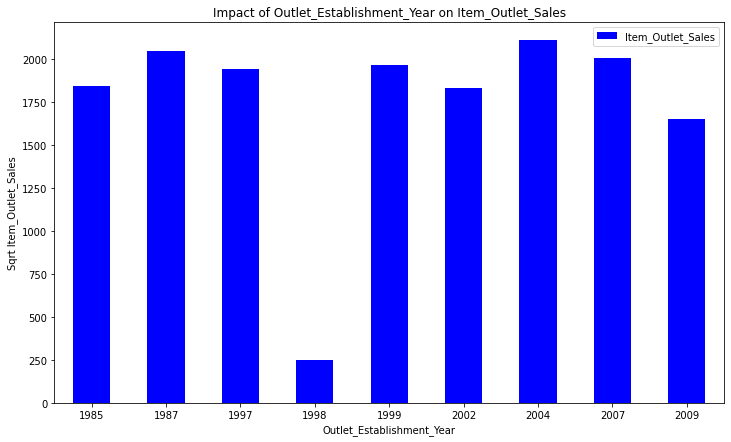

In [ ]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

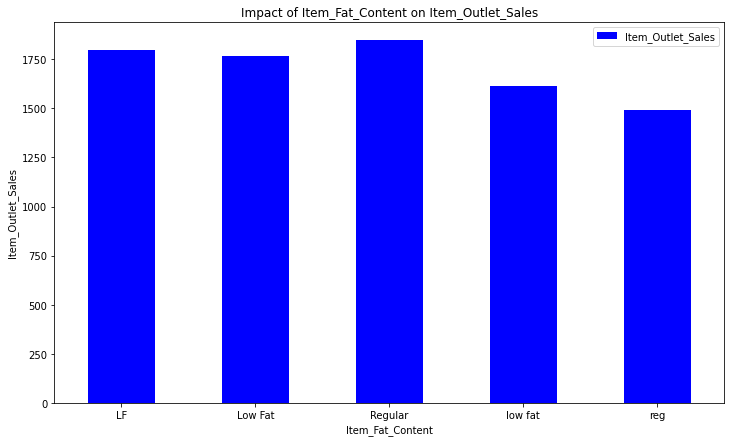

In [ ]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

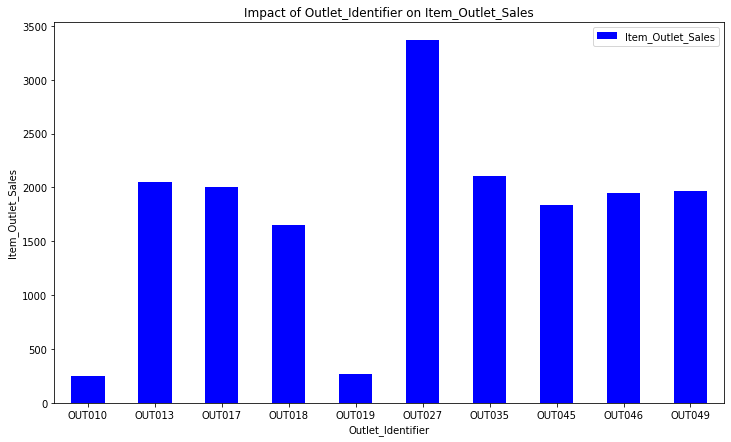

In [ ]:
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [ ]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier', aggfunc= lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [ ]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size', aggfunc= lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


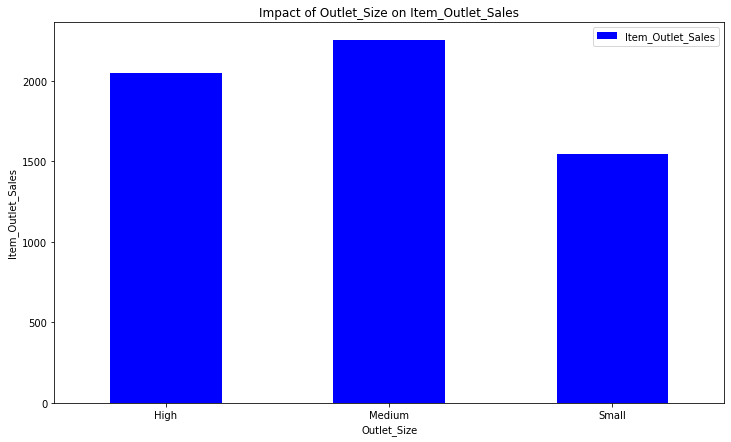

In [ ]:
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")                                                                
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

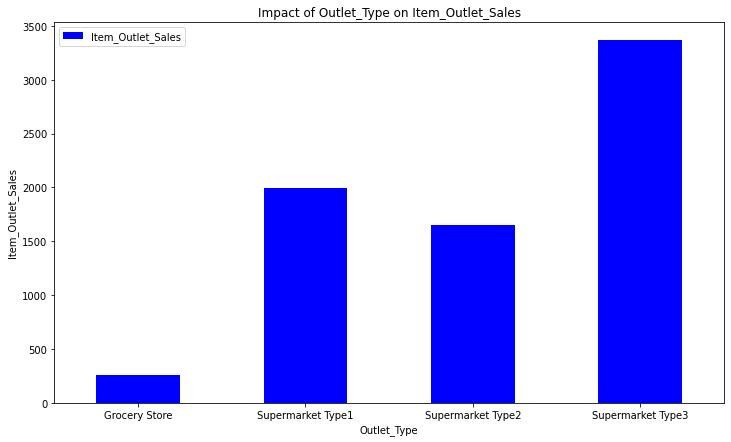

In [ ]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

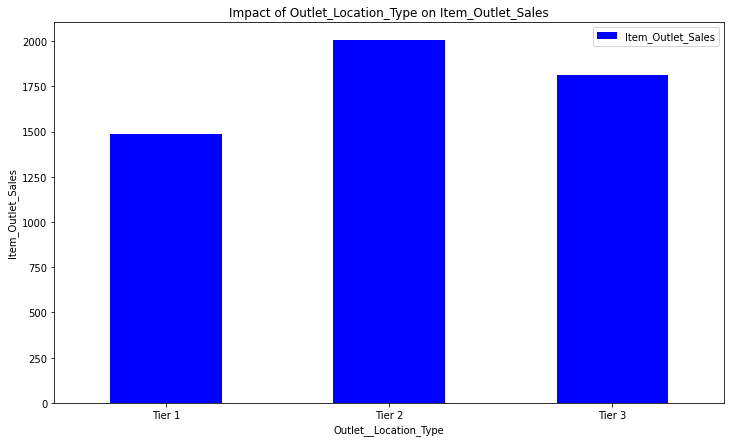

In [ ]:
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar',color='blue', figsize=(12,7))
plt.xlabel("Outlet__Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [ ]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type', aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
import numpy as np

In [ ]:
np.unique(train['Item_Fat_Content'])

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler as S, LabelEncoder as L
le = L()
sc = S()

In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
train['Item_Weight'] = sc.fit_transform(train['Item_Weight'].values.reshape(-1,1))
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'].values.reshape(-1,1))
train['Item_Type'] = le.fit_transform(train['Item_Type'].values.reshape(-1,1))
train['Item_MRP'] = sc.fit_transform(train['Item_MRP'].values.reshape(-1,1))
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'].values.reshape(-1,1))
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'].values.reshape(-1,1))
train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'].values.reshape(-1,1))
train['Outlet_Establishment_Year'] = le.fit_transform(train['Outlet_Establishment_Year'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
from sklearn.linear_model import LinearRegression as lr

In [ ]:
print(train.shape)

(6113, 10)


In [ ]:
x= train.iloc[:,0:9]
y= train['Item_Outlet_Sales']

In [ ]:
xtr,xte,ytr,yte = tts(x,y,test_size=0.2)

In [ ]:
reg = lr().fit(xtr,ytr)

In [ ]:
print('Training accuracy:', reg.score(xtr,ytr))
print('Testing accuracy:', reg.score(xte,yte))

Training accuracy: 0.49829049536455605
Testing accuracy: 0.4882416275321336


In [ ]:
p= reg.predict(xte)
p

array([1240.02876435,  419.17860755, 2919.28318073, ..., 2929.80290854,
       2056.30909285, 3931.53960456])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R Squared:',r2_score(yte,p))
print('Mean_squared_error:',mean_squared_error(yte,p))
rmse_lr= np.sqrt(mean_squared_error(yte,p))
print('Root Mean_squared_error:', rmse_lr)

R Squared: 0.4882416275321336
Mean_squared_error: 1628754.429119487
Root Mean_squared_error: 1276.2266370513848


In [ ]:
from sklearn.neighbors import KNeighborsRegressor as kr

In [ ]:
knr = kr().fit(xtr,ytr)

In [ ]:
print('Training accuracy:', knr.score(xtr,ytr))
print('Testing accuracy:', knr.score(xte,yte))

Training accuracy: 0.667786283383932
Testing accuracy: 0.49490263213611196


In [ ]:
p1= knr.predict(xte)
p1

array([1653.1814 , 1158.75832, 3447.5124 , ..., 2717.39612, 3256.82728,
       3272.93964])

In [ ]:
print('R Squared:',r2_score(yte,p1))
print('Mean_squared_error:',mean_squared_error(yte,p1))
rmse_knr= np.sqrt(mean_squared_error(yte,p1))
print('Root Mean_squared_error:', rmse_knr)

R Squared: 0.49490263213611196
Mean_squared_error: 1607554.6963260656
Root Mean_squared_error: 1267.8938032524907


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42).fit(xtr,ytr)

In [ ]:
print('Training accuracy:', xg_reg.score(xtr,ytr))
print('Testing accuracy:', xg_reg.score(xte,yte))

Training accuracy: 0.6129182381152238
Testing accuracy: 0.5732090696112168


In [ ]:
p2= xg_reg.predict(xte)
p2

array([1381.8076 ,  760.38214, 3233.8813 , ..., 3304.6619 , 2555.062  ,
       4199.5747 ], dtype=float32)

In [ ]:
print('R Squared:',r2_score(yte,p2))
print('Mean_squared_error:',mean_squared_error(yte,p2))
rmse_xg= np.sqrt(mean_squared_error(yte,p2))
print('Root Mean_squared_error:', rmse_xg)

R Squared: 0.5732090696112168
Mean_squared_error: 1358331.6963171042
Root Mean_squared_error: 1165.4748801742164


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators= 50, random_state= 42)
model.fit(xtr,ytr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
print('Training accuracy:', model.score(xtr,ytr))
print('Testing accuracy:', model.score(xte,yte))

Training accuracy: 0.9340035565660578
Testing accuracy: 0.5194304078411462


In [ ]:
p3= model.predict(xte)
p3

array([1192.58096 , 1008.407364, 2865.896152, ..., 3344.57972 ,
       2623.744692, 3557.249556])

In [ ]:
print('R Squared:',r2_score(yte,p3))
print('Mean_squared_error:',mean_squared_error(yte,p3))
rmse_rf= np.sqrt(mean_squared_error(yte,p3))
print('Root Mean_squared_error:', rmse_rf)

R Squared: 0.5194304078411462
Mean_squared_error: 1529491.0524947527
Root Mean_squared_error: 1236.7259407381866
